Importing Libraries

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [82]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'fruit-and-vegetable-image-recognition/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 359 files belonging to 36 classes.


Loading model

In [83]:
with tf.device('/device:GPU:0'):
     cnn = tf.keras.models.load_model('trained_model.h5')

Performing Prediction on single image

(-0.5, 1253.5, 835.5, -0.5)

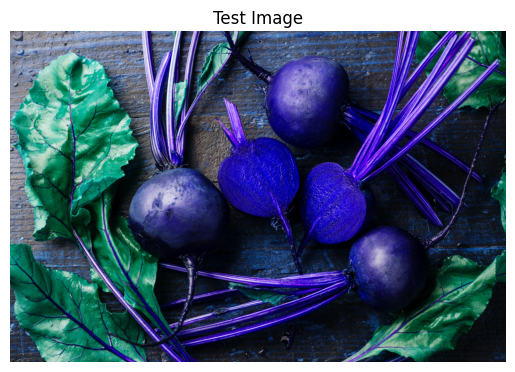

In [84]:
import cv2
image_path = 'fruit-and-vegetable-image-recognition/test/beetroot/Image_1.jpg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.title('Test Image')
plt.axis('off')

Testing Model

In [85]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_array = np.array([input_array])  # Converting single image to a batch.
predictions = cnn.predict(input_array)

1/1 [==============================] - 0s 259ms/step


In [86]:
print(predictions)

[[8.34762881e-17 4.67931872e-21 9.99999881e-01 1.21868520e-12
  9.08918756e-28 1.27828283e-15 1.93504372e-14 2.06101287e-23
  4.68844093e-13 1.27410034e-16 5.68615585e-20 1.61889802e-13
  2.02211511e-10 8.10456572e-20 1.37538508e-10 7.88222623e-13
  3.96481597e-17 8.09928417e-19 2.58883868e-16 1.70770481e-19
  2.42981883e-16 3.50560573e-16 3.95031555e-13 5.53691292e-15
  1.50277509e-24 7.51028878e-14 1.29840503e-08 1.90192515e-10
  1.81948331e-15 5.34071572e-11 3.09905198e-14 3.12954394e-24
  1.90910026e-17 1.10331615e-14 2.40739262e-10 1.70278454e-07]]


In [87]:
# test_set.class_names

In [88]:
result_index = np.where(predictions[0] == np.amax(predictions[0]))
print(result_index[0][0])

2


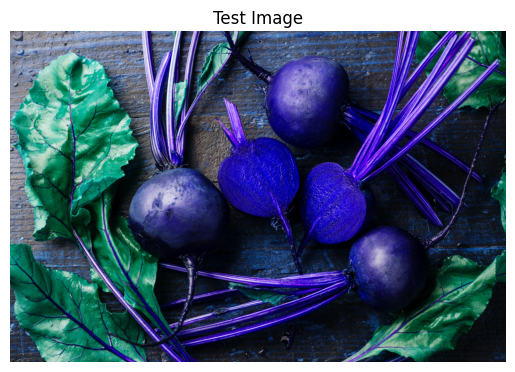

In [89]:
#Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.axis('off')
plt.show()


In [90]:
#Single Prediction
print("It is a {}".format(test_set.class_names[result_index[0][0]]))

It is a beetroot
